In [3]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

## Reading Data

In [7]:
data = pd.read_csv("headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
data.shape

(237, 4)

## Collecting X and Y

In [8]:
X = data["Head Size(cm^3)"].values
Y = data["Brain Weight(grams)"].values

In [10]:
#Mean Of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#No. of elements in X
n = len(X)

numer = 0
denom = 0

for i in range(n):
        numer += (X[i]-mean_x)*(Y[i]-mean_y)
        denom += (X[i]-mean_x) ** 2
        
m = numer/denom #slope
c= mean_y - (m*mean_x) #intercept

print(m,c)




0.26342933948939945 325.57342104944223


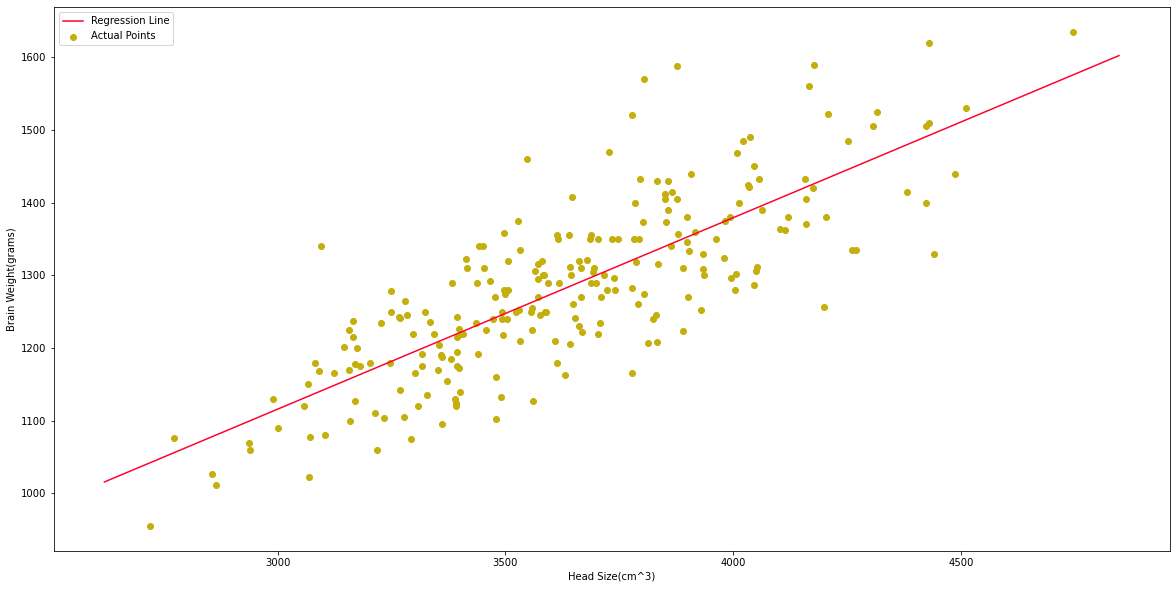

In [12]:
# Ploting and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating x and y line values
x = np.linspace(min_x,max_x,1000)
y = m*x + c

#Plotting Regression Line
plt.plot(x,y, color="#fc032c", label="Regression Line")

#Plotting scattered points
plt.scatter(X,Y,c="#c4af0c", label="Actual Points")

plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.legend()
plt.show()

In [14]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = c + m*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i]-y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use rank 1 matrix in scikit learn
X = X.reshape(n,1)
#Creating Model
reg = LinearRegression()
#Fitting Training Data
reg = reg.fit(X,Y)
#Y prediction
Y_pred = reg.predict(X)

#Calculating R^2 value
r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957
